<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [4]:
# import piplite
# await piplite.install('seaborn')

In [5]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [6]:
# filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [7]:
# await download(filepath, "housing.csv")
# file_name="housing.csv"

Load the csv:


In [8]:
# df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [9]:
# filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
# df = pd.read_csv(filepath)

In [10]:
# df.to_csv("kc_house_data_NaN.csv")

In [11]:
df = pd.read_csv("kc_house_data_NaN.csv")

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   21613 non-null  int64  
 1   Unnamed: 0     21613 non-null  int64  
 2   id             21613 non-null  int64  
 3   date           21613 non-null  object 
 4   price          21613 non-null  float64
 5   bedrooms       21600 non-null  float64
 6   bathrooms      21603 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  yr_built       21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

In [14]:
# df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id'], axis=1, inplace=True)

In [15]:
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
df.describe().style.format('{:.2f}')

,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,10806.00,4580301520.86,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,6239.28,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,0.00,1000102.00,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,5403.00,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,10806.00,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,16209.00,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,21612.00,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [17]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,600.00","21,603.00","21,613.00","21,613.00","21,613.00","21,613.00",...,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"10,806.00","10,806.00","4,580,301,520.86","540,088.14",3.37,2.12,"2,079.90","15,106.97",1.49,0.01,...,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"6,239.28","6,239.28","2,876,565,571.31","367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,0.00,0.00,"1,000,102.00","75,000.00",1.00,0.50,290.00,520.00,1.00,0.00,...,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"5,403.00","5,403.00","2,123,049,194.00","321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,...,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"10,806.00","10,806.00","3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,...,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"16,209.00","16,209.00","7,308,900,445.00","645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,...,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"21,612.00","21,612.00","9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,...,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


In [18]:
for col in ['waterfront', 'view', 'condition', 'grade']:
    print(df[col].value_counts())
    print('*' * 60)

waterfront
0    21450
1      163
Name: count, dtype: int64
************************************************************
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64
************************************************************
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
************************************************************
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
************************************************************


In [19]:
df.describe(include='O')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [20]:
df['date'] = pd.to_datetime(df['date'])
print(df.date.dtype)
df.head()

datetime64[ns]


,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,2014-10-13,"221,900.00",3.00,1.00,1180,5650,1.00,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,1,1,6414100192,2014-12-09,"538,000.00",3.00,2.25,2570,7242,2.00,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2,2,5631500400,2015-02-25,"180,000.00",2.00,1.00,770,10000,1.00,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,3,3,2487200875,2014-12-09,"604,000.00",4.00,3.00,1960,5000,1.00,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,4,4,1954400510,2015-02-18,"510,000.00",3.00,2.00,1680,8080,1.00,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [21]:
df['yr_saled'] = df.date.dt.year
df['month_saled'] = df.date.dt.month


df.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_saled,month_saled
0,0,0,7129300520,2014-10-13,"221,900.00",3.00,1.00,1180,5650,1.00,...,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10
1,1,1,6414100192,2014-12-09,"538,000.00",3.00,2.25,2570,7242,2.00,...,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12
2,2,2,5631500400,2015-02-25,"180,000.00",2.00,1.00,770,10000,1.00,...,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2
3,3,3,2487200875,2014-12-09,"604,000.00",4.00,3.00,1960,5000,1.00,...,910,1965,0,98136,47.52,-122.39,1360,5000,2014,12
4,4,4,1954400510,2015-02-18,"510,000.00",3.00,2.00,1680,8080,1.00,...,0,1987,0,98074,47.62,-122.05,1800,7503,2015,2


In [22]:
df.yr_saled.value_counts()

yr_saled
2014    14633
2015     6980
Name: count, dtype: int64

In [23]:
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
yr_saled          0
month_saled       0
dtype: int64

In [24]:
df.shape

(21613, 25)

In [25]:
# df.dropna( inplace=True)

In [26]:
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
yr_saled          0
month_saled       0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()
print('Numeric Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numeric Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_saled', 'month_saled']
Categorical Columns: []


In [29]:
# for col in num_cols:
#     sns.histplot(data=df, x=col, kde=True)
#     plt.show()

> Univariate Analysis
* Numerical Data: Histogram, Boxplot
* Categorical Data: Countplot, valuecounts

> Bivariate Analysis
* Scatterplot
* Barplot

> Multivariate Analysis
* Corr Matrix


In [30]:
# sns.pairplot(df[num_cols], hue='price')

### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [31]:
#Enter Your Code, Execute and take the Screenshot
df.dtypes

Unnamed: 0.1              int64
Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
yr_saled                  int32
month_saled               int32
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [32]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_saled,month_saled
count,"21,613.00","21,613.00","21,613.00",21613,"21,613.00","21,600.00","21,603.00","21,613.00","21,613.00","21,613.00",...,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"10,806.00","10,806.00","4,580,301,520.86",2014-10-29 04:38:01.959931648,"540,088.14",3.37,2.12,"2,079.90","15,106.97",1.49,...,291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46","2,014.32",6.57
min,0.00,0.00,"1,000,102.00",2014-05-02 00:00:00,"75,000.00",1.00,0.50,290.00,520.00,1.00,...,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"2,014.00",1.00
25%,"5,403.00","5,403.00","2,123,049,194.00",2014-07-22 00:00:00,"321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,...,0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","2,014.00",4.00
50%,"10,806.00","10,806.00","3,904,930,410.00",2014-10-16 00:00:00,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,...,0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","2,014.00",6.00
75%,"16,209.00","16,209.00","7,308,900,445.00",2015-02-17 00:00:00,"645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,...,560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","2,015.00",9.00
max,"21,612.00","21,612.00","9,900,000,190.00",2015-05-27 00:00:00,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,...,"4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","2,015.00",12.00
std,"6,239.28","6,239.28","2,876,565,571.31",NaN,"367,127.20",0.93,0.77,918.44,"41,420.51",0.54,...,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18",0.47,3.12


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [33]:
#Enter Your Code, Execute and take the Screenshot
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df.describe()

,Unnamed: 0.1,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_saled,month_saled
count,"21,613.00",21613,"21,613.00","21,600.00","21,603.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00",...,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"10,806.00",2014-10-29 04:38:01.959931648,"540,088.14",3.37,2.12,"2,079.90","15,106.97",1.49,0.01,0.23,...,291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46","2,014.32",6.57
min,0.00,2014-05-02 00:00:00,"75,000.00",1.00,0.50,290.00,520.00,1.00,0.00,0.00,...,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"2,014.00",1.00
25%,"5,403.00",2014-07-22 00:00:00,"321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,...,0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","2,014.00",4.00
50%,"10,806.00",2014-10-16 00:00:00,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,...,0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","2,014.00",6.00
75%,"16,209.00",2015-02-17 00:00:00,"645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,...,560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","2,015.00",9.00
max,"21,612.00",2015-05-27 00:00:00,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,...,"4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","2,015.00",12.00
std,"6,239.28",NaN,"367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,...,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18",0.47,3.12


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [34]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [35]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [36]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [37]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [38]:
#Enter Your Code, Execute and take the Screenshot
df.floors.value_counts().to_frame()

,count
floors,
1.00,10680
2.00,8241
1.50,1910
3.00,613
2.50,161
3.50,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


<Axes: xlabel='waterfront', ylabel='price'>

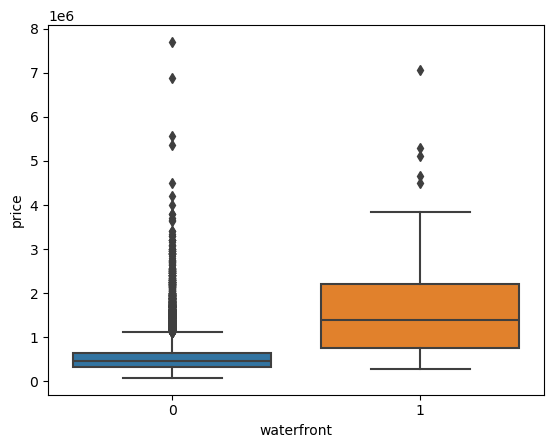

In [39]:
sns.boxplot(x="waterfront", y="price", data=df)

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


<Axes: xlabel='sqft_above', ylabel='price'>

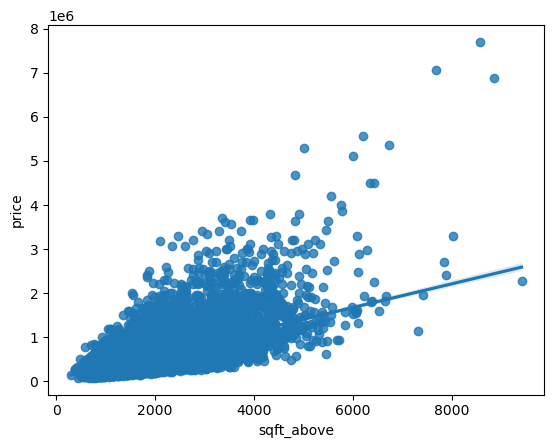

In [40]:
#Enter Your Code, Execute and take the Screenshot
sns.regplot(x="sqft_above", y="price", data=df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [41]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.05
month_saled     -0.01
yr_saled         0.00
long             0.02
Unnamed: 0.1     0.03
condition        0.04
yr_built         0.05
sqft_lot15       0.08
sqft_lot         0.09
yr_renovated     0.13
floors           0.26
waterfront       0.27
lat              0.31
bedrooms         0.31
sqft_basement    0.32
view             0.40
bathrooms        0.53
sqft_living15    0.59
sqft_above       0.61
grade            0.67
sqft_living      0.70
price            1.00
Name: price, dtype: float64

In [42]:
# Feature Engineering
df['house_age'] = df.yr_saled - df.yr_built
df['renovated'] = df.yr_renovated.apply(lambda x: 0 if x == 0 else 1)

In [43]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
renovated        0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
Unnamed: 0.1     0.03
long             0.02
yr_saled         0.00
month_saled     -0.01
zipcode         -0.05
house_age       -0.05
Name: price, dtype: float64

In [44]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Unnamed: 0.1,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_saled,month_saled,house_age,renovated
Unnamed: 0.1,1.000000,0.027372,0.010306,0.106989,0.044717,-0.026877,0.179138,-0.007611,-0.013751,-0.095419,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827,-0.001545,0.001570,-0.199560,-0.025574
price,0.027372,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.053951,0.126092
bedrooms,0.010306,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430,-0.009949,-0.001132,-0.155896,0.018166
bathrooms,0.106989,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539,-0.026433,0.007374,-0.507298,0.050080
sqft_living,0.044717,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,-0.318488,0.055094
sqft_lot,-0.026877,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369,-0.052990,0.007745
floors,0.179138,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005,-0.489640,0.006260
waterfront,-0.007611,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132,0.026093,0.093294
view,-0.013751,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638,0.053458,0.104062
condition,-0.095419,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978,0.360665,-0.060139


<Axes: xlabel='view', ylabel='price'>

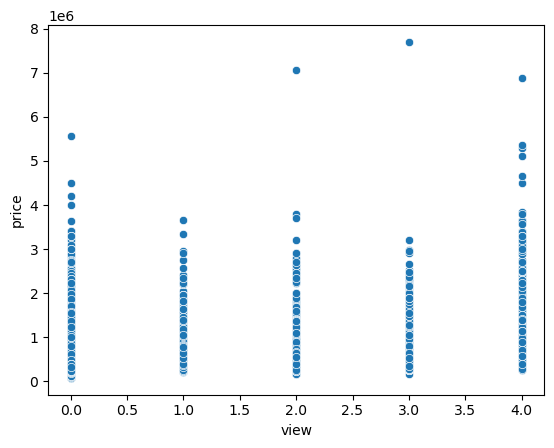

In [45]:
sns.scatterplot(x="view", y="price", data=df)

In [46]:
df.groupby('view').median()['price'].sort_values()

view
0     432,500.00
2     675,000.00
1     690,944.00
3     802,500.00
4   1,185,000.00
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [47]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [48]:
#Enter Your Code, Execute and take the Screenshot
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [49]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [50]:
#Enter Your Code, Execute and take the Screenshot
X = df[features]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.6576951666037505

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [51]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [52]:
#Enter Your Code, Execute and take the Screenshot
pipe = Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.7513323588250258

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [54]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [55]:
from sklearn.linear_model import Ridge

In [56]:
#Enter Your Code, Execute and take the Screenshot

RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.6478759163939107

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [57]:
#Enter Your Code, Execute and take the Screenshot
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7002744263524896

In [58]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', Ridge())]

param_grid = {'polynomial__degree': [2, 3, 4],
              'model__alpha': [1, 0.1, 0.01]}

pipe = Pipeline(steps)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1, 0.1, 0.01],
                         'polynomial__degree': [2, 3, 4]})

In [59]:
grid.best_params_

{'model__alpha': 1, 'polynomial__degree': 2}

In [60]:
steps = [('scaler', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
         ('model', Ridge(alpha=1))]

pipe = Pipeline(steps)
scores = cross_val_score(pipe, x_train, y_train, cv=5)

In [61]:
scores

array([0.76951699, 0.72567327, 0.75457947, 0.71999231, 0.72719247])

In [62]:
scores.mean(), scores.std()

(0.7393909027555009, 0.01924346317712645)

In [63]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=1))])

In [64]:
# Final Evaluation

pipe.score(x_test, y_test)

0.7117216852264103

# Inference

In [66]:
import pickle

pickle.dump(pipe, open('Car_Price_Model.pkl', 'wb'))

In [67]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

In [68]:
import pickle

model = pickle.load(open('Car_Price_Model.pkl', 'rb'))

In [69]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=1))])

In [74]:
x_test.iloc[0]

floors              2.00
waterfront          0.00
lat                47.44
bedrooms            4.00
sqft_basement       0.00
view                0.00
bathrooms           2.75
sqft_living15   2,900.00
sqft_above      2,790.00
grade               9.00
sqft_living     2,790.00
Name: 15544, dtype: float64

In [76]:
y_test.iloc[0]

459000.0

In [77]:
model.predict([x_test.iloc[0]])

array([589034.98462011])